# Part II - Ford GoBike Exploration
## by Skyla Ah Shene

## Investigation Overview
>  My main topic of research for this dataset is analysing and looking at the relationship between the different genders, subscribers and non-subscribers, and the most popular time of day.

## Dataset Overview
> The Ford GoBike data is information concerning bike rides, and we will will only be focusing on the 2019 February dataset. It contains the following variables: Trip Duration (seconds) Start Time and Date End Time and Date Start Station ID Start Station Name Start Station Latitude Start Station Longitude End Station ID End Station Name End Station Latitude End Station Longitude Bike ID User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) source: https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe
df_full = pd.read_csv('ford-gobike-data.csv')

In [3]:
df_full.dropna(axis = 0, inplace = True)

In [4]:
varss =['user_type', 'member_gender', 'bike_share_for_all_trip']
for var in varss:
    df_full[var] = df_full[var].astype('category')

In [5]:
df_full['start_time'] = pd.to_datetime(df_full['start_time'])
df_full['end_time'] = pd.to_datetime(df_full['end_time'])

In [6]:
df_full.member_birth_year = df_full.member_birth_year.astype('int')

In [7]:
df_full['time_of_day'] = pd.to_datetime(df_full.start_time).dt.strftime('%p')
df_full.time_of_day

0         PM
2         PM
3         PM
4         PM
5         PM
6         PM
7         PM
8         PM
9         PM
10        PM
11        PM
12        PM
14        PM
15        PM
16        PM
17        PM
18        PM
19        PM
20        PM
21        PM
22        PM
23        PM
24        PM
25        PM
26        PM
27        PM
29        PM
30        PM
31        PM
32        PM
          ..
183381    AM
183382    AM
183383    AM
183384    AM
183385    AM
183386    AM
183387    AM
183388    AM
183389    AM
183390    AM
183391    AM
183392    AM
183393    AM
183394    AM
183395    AM
183396    AM
183397    AM
183398    AM
183399    AM
183400    AM
183401    AM
183403    AM
183404    AM
183405    AM
183406    AM
183407    AM
183408    AM
183409    AM
183410    AM
183411    AM
Name: time_of_day, Length: 174952, dtype: object

In [8]:
df_full['day_of_week'] = pd.to_datetime(df_full.start_time).dt.strftime('%A')
df_full['day_of_week']

0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
29        Thursday
30        Thursday
31        Thursday
32        Thursday
            ...   
183381      Friday
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183388      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183403      

In [9]:
df_full['duration_min'] = df_full['duration_sec']/60

df_full['start_date'] = df_full.start_time.dt.strftime('%Y-%m-%d')
df_full['start_hour_of_day'] = df_full.start_time.dt.strftime('%H')
df_full['start_day_of_week'] = df_full.start_time.dt.strftime('%A')
df_full['start_month'] = df_full.start_time.dt.strftime('%b')
df_full.head(10)

df_full['year_month'] = df_full['start_time'].dt.to_period('M')

In [10]:
# display the new clean data
df_full['duration_min']=df_full['duration_sec']/60
df_full['duration_hr']=df_full['duration_min']/60
df_full['duration_min']=df_full['duration_min'].astype(int)
df_full['duration_hr']=df_full['duration_hr'].astype(int)
df_full.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

      ...      bike_share_for_all_trip  time_of_day day_of_week  duration_min  \
0     ...                           No           PM    Thursday           869   
2     ...                           No           PM    Thursday          1030   
3     ...                           No           PM    Thursday           608   
4     ...                          Yes           PM    Thursday            26   
5     ...                           No           PM    Thursday            29   

   start_date start_hour_of_day start_day_of_week start_month  year_month  \
0  2019-02-28                17          Thursday         Feb     2019-02   
2  2019-02-28                12          Thursday         Feb     2019-02   
3  2019-02-28                17          Thursday         Feb     2019-02   
4  2019-02-28                23          Thursday         Feb     2019-02   
5  2019-02-28                23          Thursday         Feb     2019-02   

  duration_hr  
0          14  
2          17  
3          10  
4           0  
5           0  

[5 rows x 25 columns]

In [11]:
df_full['start_station_id'] = df_full['start_station_id'][0]

In [12]:
type(df_full['start_date'][0])

str

In [13]:
df_full.user_type = df_full.user_type.astype('category')
df_full.bike_share_for_all_trip = df_full.bike_share_for_all_trip.astype('category')

In [14]:
# covert the datatypes
df_full.bike_id = df_full.bike_id.astype(str)
df_full.start_station_id = df_full.start_station_id.astype(str)
df_full.end_station_id = df_full.end_station_id.astype(str)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Analysing the genders
The gender involved in bike sharing the most was the male gender, which were over 120000. That leaves the females with the lowest count of around about just over 40000. And the rest did not specify a specific gender.

Text(0.5,1,'Analysing the difference in genders relating to bike sharing')

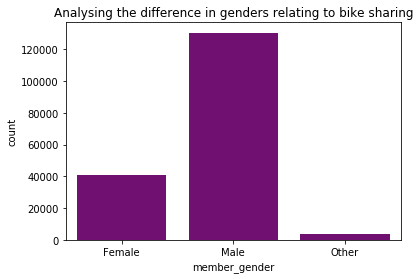

In [15]:
sb.countplot(data=df_full, x='member_gender', color='purple');
plt.title('Analysing the difference in genders relating to bike sharing')

## Relationship between the type of user and gender
> It is clear that there is greater relationship between the males and being a subscriber. The gender with the least subscribers are females.

Text(0.5,1,'Relationship between the user type and gender')

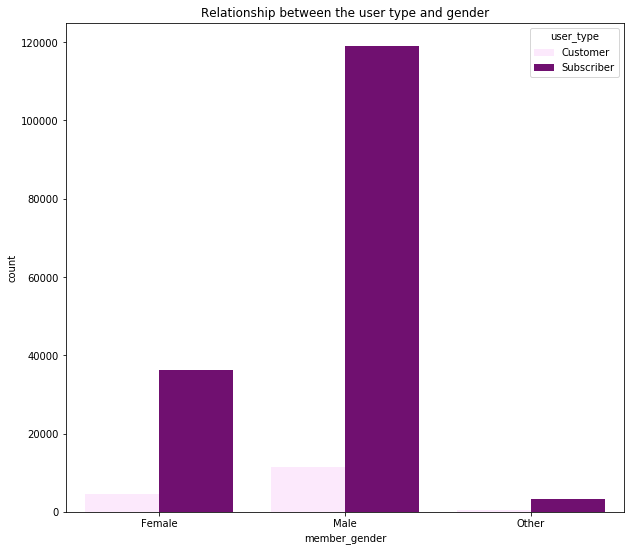

In [17]:
plt.figure(figsize=[10,9])
sb.countplot(data=df_full,x='member_gender', color = 'purple', hue='user_type');
plt.title('Relationship between the user type and gender')

## Subscriber / non-subscriber distribution during the week (in minutes)
> From this barchart we can clearly see that the trips are mainly made by random customers instead of subscribers. There are big gaps between the amount of subscriber and those who are not. The customers seem to have longer rides on the weekends than during the week, and the subscribers almost have an equal spread of time they spend riding during the entire week with just a slight increase during the weekend.

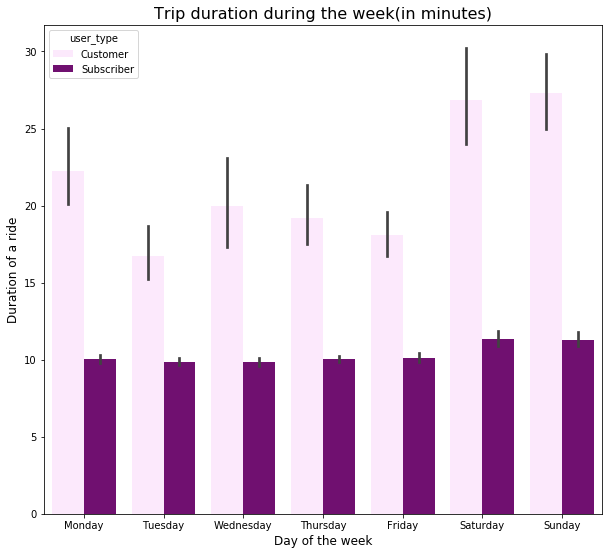

In [18]:
plt.figure(figsize=(10,9))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_full['start_day_of_week'] = df_full['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=df_full, x='start_day_of_week', y='duration_min', color = 'purple', hue='user_type')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Duration of a ride', fontsize=12)
plt.title("Trip duration during the week(in minutes)", fontsize=16);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [19]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
